In [1]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_timely_care = pd.read_csv("../Resources/Timely_and_Effective_Care-State.csv")
df_unplanned_visits = pd.read_csv("../Resources/FY_2023_Hospital_Readmissions_Reduction_Program_Hospital.csv")

In [3]:
df_merged = pd.merge(df_timely_care, df_unplanned_visits, on='State')
correlation_matrix = df_merged.corr()

In [4]:
df_merged.columns

Index(['State', 'Condition', 'Measure ID', 'Measure Name_x', 'Score',
       'Footnote_x', 'Start Date_x', 'End Date_x', 'Facility Name',
       'Facility ID', 'Measure Name_y', 'Number of Discharges', 'Footnote_y',
       'Excess Readmission Ratio', 'Predicted Readmission Rate',
       'Expected Readmission Rate', 'Number of Readmissions', 'Start Date_y',
       'End Date_y'],
      dtype='object')

In [5]:
print(df_merged.isnull().sum())

State                              0
Condition                          0
Measure ID                         0
Measure Name_x                     0
Score                              0
Footnote_x                     47622
Start Date_x                       0
End Date_x                         0
Facility Name                      0
Facility ID                        0
Measure Name_y                     0
Number of Discharges          221973
Footnote_y                    297137
Excess Readmission Ratio      139633
Predicted Readmission Rate    139633
Expected Readmission Rate     139633
Number of Readmissions        139633
Start Date_y                       0
End Date_y                         0
dtype: int64


In [6]:
df_merged = df_merged.rename(columns={
    'Measure Name_x': 'Timely Care Measure Name',
    'Footnote_x': 'Timely Care Footnote',
    'Start Date_x': 'Timely Care Start Date',
    'End Date_x': 'Timely Care End Date',
    'Measure Name_y': 'Readmission Measure Name',
    'Footnote_y': 'Readmission Footnote',
    'Start Date_y': 'Readmission Start Date',
    'End Date_y': 'Readmission End Date'
})


In [7]:
# Convert date columns to datetime format
df_merged['Timely Care Start Date'] = pd.to_datetime(df_merged['Timely Care Start Date'])
df_merged['Timely Care End Date'] = pd.to_datetime(df_merged['Timely Care End Date'])
df_merged['Readmission Start Date'] = pd.to_datetime(df_merged['Readmission Start Date'])
df_merged['Readmission End Date'] = pd.to_datetime(df_merged['Readmission End Date'])

In [8]:
# Convert dates to ordinal numbers
df_merged['Timely Care Start Date Ordinal'] = df_merged['Timely Care Start Date'].apply(lambda x: x.toordinal())
df_merged['Readmission Start Date Ordinal'] = df_merged['Readmission Start Date'].apply(lambda x: x.toordinal())


In [9]:
# Calculate Spearman's rank correlation
corr, p_value = stats.spearmanr(df_merged['Timely Care Start Date Ordinal'], df_merged['Readmission Start Date Ordinal'])

print(f"Spearman's correlation coefficient: {corr}")
print(f"P-value: {p_value}")


Spearman's correlation coefficient: nan
P-value: nan


In [10]:
df_merged.head()


State                         Condition    Measure ID  \
0    AK  Healthcare Personnel Vaccination  HCP_COVID_19   
1    AK  Healthcare Personnel Vaccination  HCP_COVID_19   
2    AK  Healthcare Personnel Vaccination  HCP_COVID_19   
3    AK  Healthcare Personnel Vaccination  HCP_COVID_19   
4    AK  Healthcare Personnel Vaccination  HCP_COVID_19   

                            Timely Care Measure Name Score  \
0  Percentage of healthcare personnel who complet...  87.3   
1  Percentage of healthcare personnel who complet...  87.3   
2  Percentage of healthcare personnel who complet...  87.3   
3  Percentage of healthcare personnel who complet...  87.3   
4  Percentage of healthcare personnel who complet...  87.3   

  Timely Care Footnote Timely Care Start Date Timely Care End Date  \
0                  NaN             2022-07-01           2022-09-30   
1                  NaN             2022-07-01           2022-09-30   
2                  NaN             2022-07-01           2022-09-30   
3                  NaN             2022-07-01           2022-09-30   
4                  NaN             2022-07-01           2022-09-30   

                      Facility Name  Facility ID  ... Number of Discharges  \
0  PROVIDENCE ALASKA MEDICAL CENTER        20001  ...                  NaN   
1  PROVIDENCE ALASKA MEDICAL CENTER        20001  ...                187.0   
2  PROVIDENCE ALASKA MEDICAL CENTER        20001  ...                423.0   
3  PROVIDENCE ALASKA MEDICAL CENTER        20001  ...                174.0   
4  PROVIDENCE ALASKA MEDICAL CENTER        20001  ...                  NaN   

   Readmission Footnote  Excess Readmission Ratio  Predicted Readmission Rate  \
0                   NaN                    1.2343                      4.3382   
1                   NaN                    1.0053                     16.3683   
2                   NaN                    0.9271                     19.1239   
3                   NaN                    0.9686                     18.6758   
4                   NaN                    0.9301                     10.6299   

   Expected Readmission Rate  Number of Readmissions Readmission Start Date  \
0                     3.5146       Too Few to Report             2018-07-01   
1                    16.2814                      31             2018-07-01   
2                    20.6266                      76             2018-07-01   
3                    19.2805                      30             2018-07-01   
4                    11.4293       Too Few to Report             2018-07-01   

  Readmission End Date Timely Care Start Date Ordinal  \
0           2021-06-30                         738337   
1           2021-06-30                         738337   
2           2021-06-30                         738337   
3           2021-06-30                         738337   
4           2021-06-30                         738337   

   Readmission Start Date Ordinal  
0                          736876  
1                          736876  
2                          736876  
3                          736876  
4                          736876  

[5 rows x 21 columns]

In [11]:
# Check if there are still NaN values in the columns
print("Missing values in 'Timely Care Start Date':", df_merged['Timely Care Start Date'].isna().sum())
print("Missing values in 'Readmission Start Date':", df_merged['Readmission Start Date'].isna().sum())
print("Missing values in 'Timely Care End Date':", df_merged['Timely Care End Date'].isna().sum())
print("Missing values in 'Readmission End Date':", df_merged['Readmission End Date'].isna().sum())

# Check the number of unique values in the columns
print("Unique values in 'Timely Care Start Date':", df_merged['Timely Care Start Date'].nunique())
print("Unique values in 'Readmission Start Date':", df_merged['Readmission Start Date'].nunique())
print("Unique values in 'Timely Care End Date':", df_merged['Timely Care End Date'].nunique())
print("Unique values in 'Readmission End Date':", df_merged['Readmission End Date'].nunique())

Missing values in 'Timely Care Start Date': 0
Missing values in 'Readmission Start Date': 0
Missing values in 'Timely Care End Date': 0
Missing values in 'Readmission End Date': 0
Unique values in 'Timely Care Start Date': 3
Unique values in 'Readmission Start Date': 1
Unique values in 'Timely Care End Date': 3
Unique values in 'Readmission End Date': 1


In [12]:
# Convert columns to appropriate data types
df_merged['Score'] = pd.to_numeric(df_merged['Score'], errors='coerce')
df_merged['Excess Readmission Ratio'] = pd.to_numeric(df_merged['Excess Readmission Ratio'], errors='coerce')
df_merged['Predicted Readmission Rate'] = pd.to_numeric(df_merged['Predicted Readmission Rate'], errors='coerce')
df_merged['Expected Readmission Rate'] = pd.to_numeric(df_merged['Expected Readmission Rate'], errors='coerce')
df_merged['Number of Readmissions'] = pd.to_numeric(df_merged['Number of Readmissions'], errors='coerce')

In [13]:

# Correlation between Score and Excess Readmission Ratio
corr_score_excess_ratio, pvalue_score_excess_ratio = spearmanr(df_merged['Score'], df_merged['Excess Readmission Ratio'], nan_policy='omit')
print(f"Correlation between Score and Excess Readmission Ratio: {corr_score_excess_ratio}")
print(f"P-value: {pvalue_score_excess_ratio}\n")

# Correlation between Score and Predicted Readmission Rate
corr_score_predicted_rate, pvalue_score_predicted_rate = spearmanr(df_merged['Score'], df_merged['Predicted Readmission Rate'], nan_policy='omit')
print(f"Correlation between Score and Predicted Readmission Rate: {corr_score_predicted_rate}")
print(f"P-value: {pvalue_score_predicted_rate}\n")



Correlation between Score and Excess Readmission Ratio: 0.006718090044784572
P-value: 0.00029916952038074675

Correlation between Score and Predicted Readmission Rate: 0.007644293595925155
P-value: 3.879158957939693e-05



In [14]:
#Correlation between 'Score' and 'Excess Readmission Ratio': 0.0067
#This is a positive correlation, indicating that as the "Score" increases, the "Excess Readmission Ratio" also tends to increase slightly (and vice versa). However, the magnitude of this correlation is very close to 0, suggesting the relationship is extremely weak.
#P-value: 0.0003: This is less than the common significance level of 0.05, indicating that this correlation is statistically significant. But remember, just because it's statistically significant does not mean the correlation is strong or practically significant. In this case, the correlation is very weak.

#Correlation between 'Score' and 'Predicted Readmission Rate': 0.0076
#This is also a positive correlation, suggesting that as the "Score" goes up, the "Predicted Readmission Rate" also tends to rise slightly. Again, the strength of this correlation is very weak, given the coefficient's proximity to 0.
#P-value: 3.879e-05 (or 0.00003879): This p-value is also below 0.05, meaning the correlation is statistically significant, albeit weak.

In [15]:
corr_discharge_readmission = df_merged['Number of Discharges'].corr(df_merged['Excess Readmission Ratio'])
corr_score_expected = df_merged['Score'].corr(df_merged['Expected Readmission Rate'])

print("Correlation between 'Number of Discharges' and 'Excess Readmission Ratio':", corr_discharge_readmission)
print("Correlation between 'Score' and 'Expected Readmission Rate':", corr_score_expected)

Correlation between 'Number of Discharges' and 'Excess Readmission Ratio': -0.14045592972219004
Correlation between 'Score' and 'Expected Readmission Rate': 0.006671068578283276


In [16]:
#Correlation between 'Number of Discharges' and 'Excess Readmission Ratio': -0.0834
#The negative sign indicates an inverse relationship. As the number of discharges increases, the excess readmission ratio decreases (and vice versa).

#Correlation between 'Score' and 'Expected Readmission Rate': 0.0067
#The positive sign indicates that as one variable increases, the other tends to increase as well (and vice versa).

df_merged.head()


State                         Condition    Measure ID  \
0    AK  Healthcare Personnel Vaccination  HCP_COVID_19   
1    AK  Healthcare Personnel Vaccination  HCP_COVID_19   
2    AK  Healthcare Personnel Vaccination  HCP_COVID_19   
3    AK  Healthcare Personnel Vaccination  HCP_COVID_19   
4    AK  Healthcare Personnel Vaccination  HCP_COVID_19   

                            Timely Care Measure Name  Score  \
0  Percentage of healthcare personnel who complet...   87.3   
1  Percentage of healthcare personnel who complet...   87.3   
2  Percentage of healthcare personnel who complet...   87.3   
3  Percentage of healthcare personnel who complet...   87.3   
4  Percentage of healthcare personnel who complet...   87.3   

  Timely Care Footnote Timely Care Start Date Timely Care End Date  \
0                  NaN             2022-07-01           2022-09-30   
1                  NaN             2022-07-01           2022-09-30   
2                  NaN             2022-07-01           2022-09-30   
3                  NaN             2022-07-01           2022-09-30   
4                  NaN             2022-07-01           2022-09-30   

                      Facility Name  Facility ID  ... Number of Discharges  \
0  PROVIDENCE ALASKA MEDICAL CENTER        20001  ...                  NaN   
1  PROVIDENCE ALASKA MEDICAL CENTER        20001  ...                187.0   
2  PROVIDENCE ALASKA MEDICAL CENTER        20001  ...                423.0   
3  PROVIDENCE ALASKA MEDICAL CENTER        20001  ...                174.0   
4  PROVIDENCE ALASKA MEDICAL CENTER        20001  ...                  NaN   

   Readmission Footnote  Excess Readmission Ratio  Predicted Readmission Rate  \
0                   NaN                    1.2343                      4.3382   
1                   NaN                    1.0053                     16.3683   
2                   NaN                    0.9271                     19.1239   
3                   NaN                    0.9686                     18.6758   
4                   NaN                    0.9301                     10.6299   

   Expected Readmission Rate  Number of Readmissions  Readmission Start Date  \
0                     3.5146                     NaN              2018-07-01   
1                    16.2814                    31.0              2018-07-01   
2                    20.6266                    76.0              2018-07-01   
3                    19.2805                    30.0              2018-07-01   
4                    11.4293                     NaN              2018-07-01   

  Readmission End Date Timely Care Start Date Ordinal  \
0           2021-06-30                         738337   
1           2021-06-30                         738337   
2           2021-06-30                         738337   
3           2021-06-30                         738337   
4           2021-06-30                         738337   

   Readmission Start Date Ordinal  
0                          736876  
1                          736876  
2                          736876  
3                          736876  
4                          736876  

[5 rows x 21 columns]

In [17]:
#Output the df_merged dataframe to a csv file
#File was too big for git 
#df_merged.to_csv("../Outputs/timely_and_efficient_care-clean.csv", index=False)

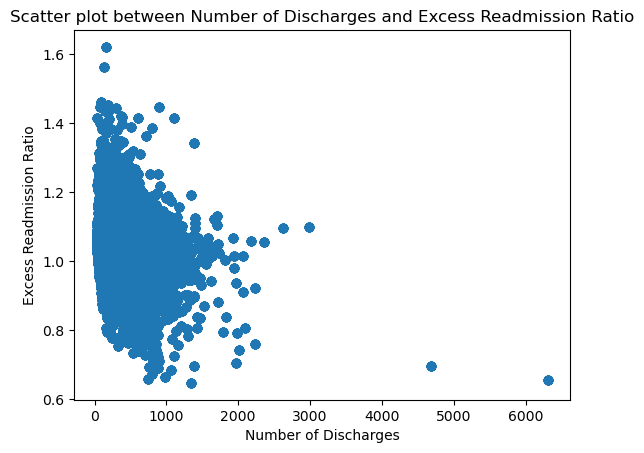

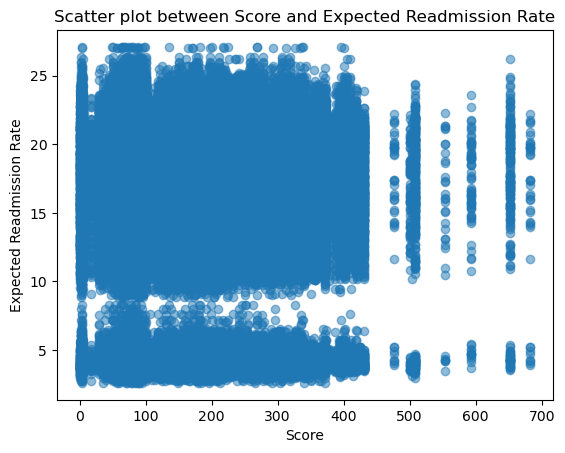

In [22]:
# Scatter plot for 'Number of Discharges' and 'Excess Readmission Ratio'
plt.scatter(df_merged['Number of Discharges'], df_merged['Excess Readmission Ratio'], alpha=0.5)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Scatter plot between Number of Discharges and Excess Readmission Ratio')
plt.savefig('..\Visualizations\scatter_discharge_readmission.png')
plt.show()


# Scatter plot for 'Score' and 'Expected Readmission Rate'
plt.scatter(df_merged['Score'], df_merged['Expected Readmission Rate'], alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Expected Readmission Rate')
plt.title('Scatter plot between Score and Expected Readmission Rate')
plt.show()

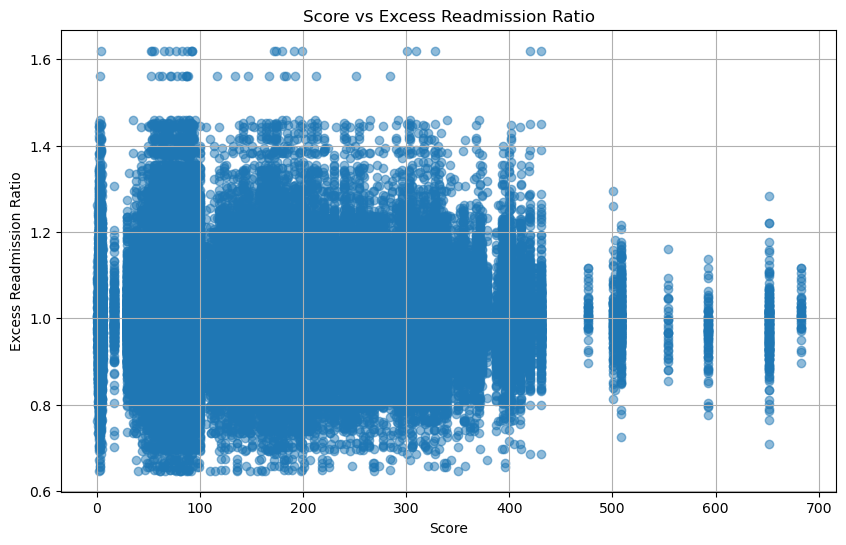

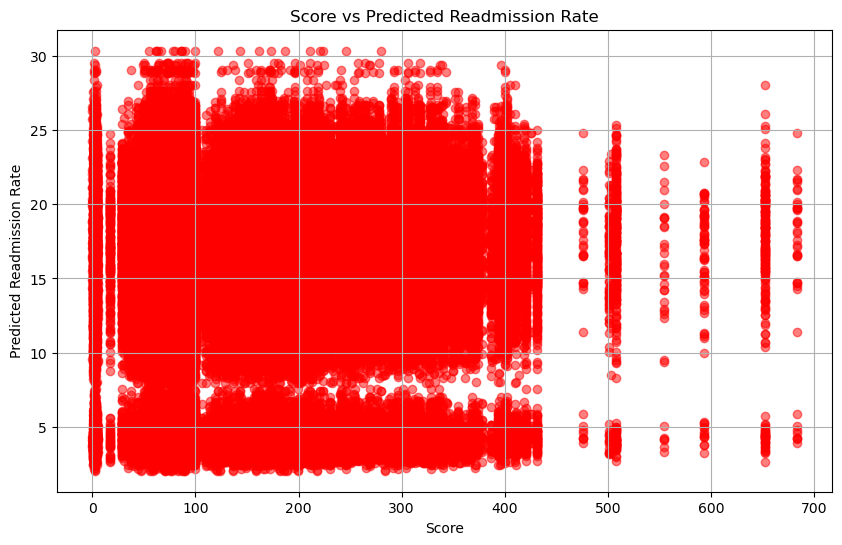

In [19]:
import matplotlib.pyplot as plt

# Scatter plot for Score vs Excess Readmission Ratio
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Score'], df_merged['Excess Readmission Ratio'], alpha=0.5)
plt.title('Score vs Excess Readmission Ratio')
plt.xlabel('Score')
plt.ylabel('Excess Readmission Ratio')
plt.grid(True)
plt.show()

# Scatter plot for Score vs Predicted Readmission Rate
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Score'], df_merged['Predicted Readmission Rate'], alpha=0.5, color='r')
plt.title('Score vs Predicted Readmission Rate')
plt.xlabel('Score')
plt.ylabel('Predicted Readmission Rate')
plt.grid(True)
plt.show()


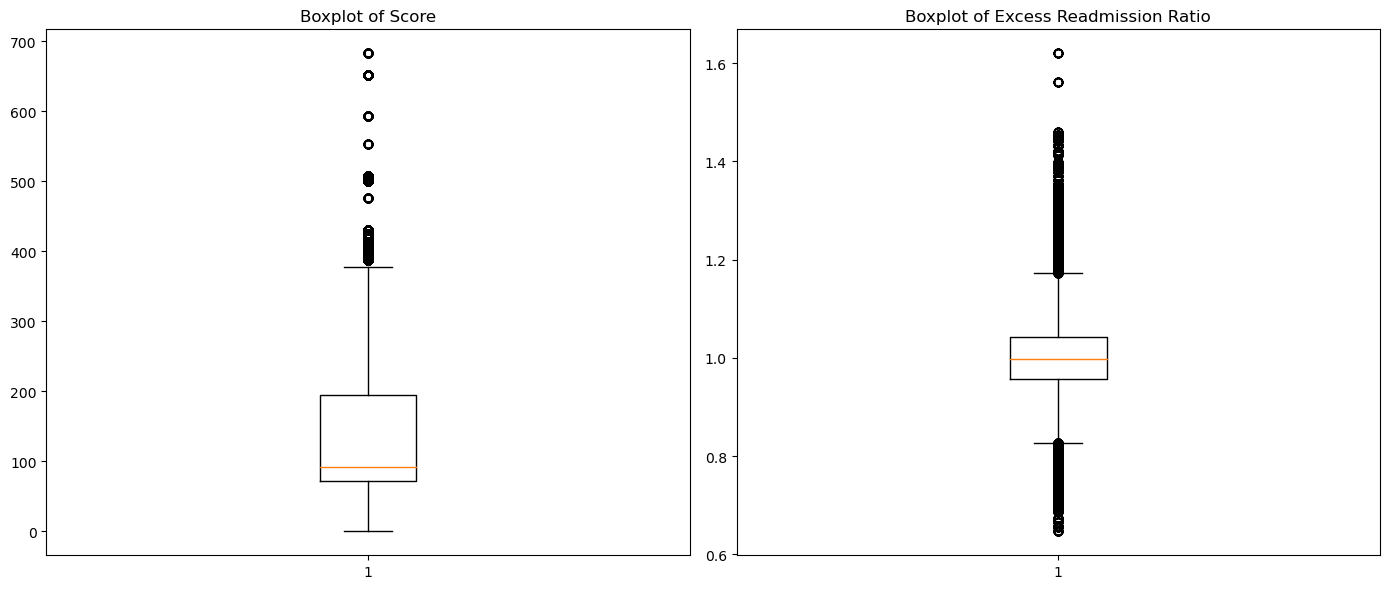

In [20]:

plt.figure(figsize=(14, 6))

# For Score
plt.subplot(1, 2, 1)
plt.boxplot(df_merged['Score'].dropna()) # dropna to handle missing values
plt.title('Boxplot of Score')

# For Excess Readmission Ratio
plt.subplot(1, 2, 2)
plt.boxplot(df_merged['Excess Readmission Ratio'].dropna())
plt.title('Boxplot of Excess Readmission Ratio')


#Output plots to the Visualizations folder
plt.savefig("../Visualizations/boxplot_of_Score_Readmission_ratio.png")


plt.tight_layout()
plt.show()


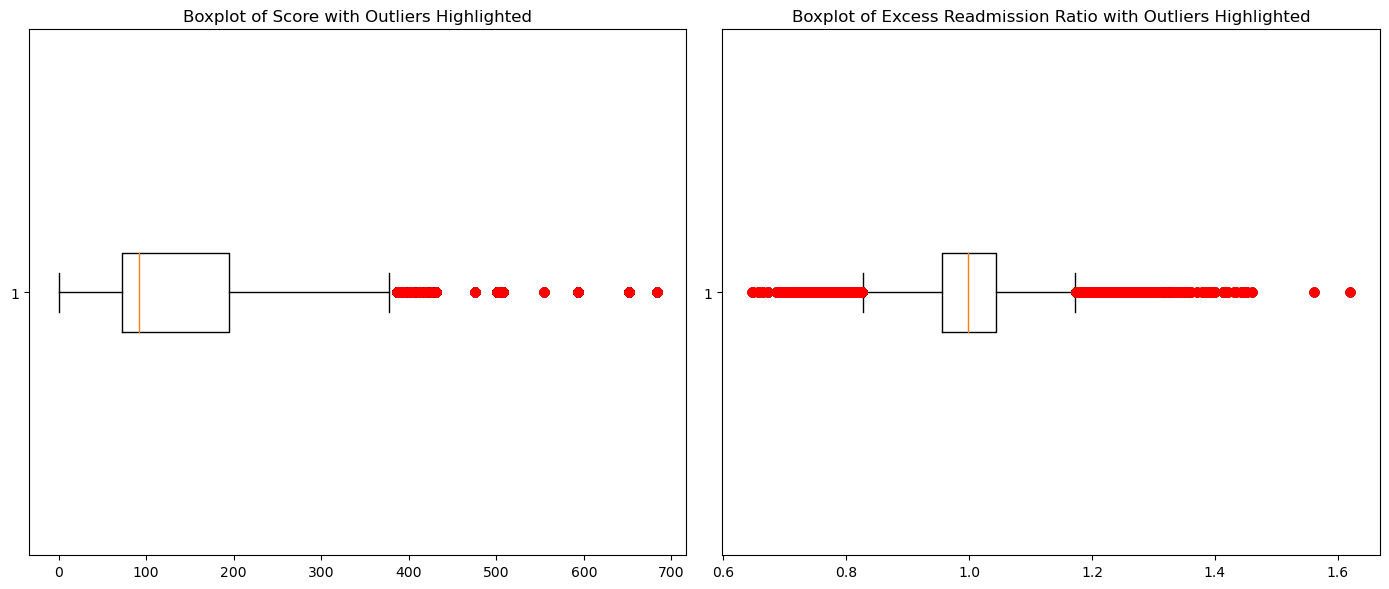

In [21]:

# Calculate IQR for Score
Q1_score = df_merged['Score'].quantile(0.25)
Q3_score = df_merged['Score'].quantile(0.75)
IQR_score = Q3_score - Q1_score
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

# Calculate IQR for Excess Readmission Ratio
Q1_readmission = df_merged['Excess Readmission Ratio'].quantile(0.25)
Q3_readmission = df_merged['Excess Readmission Ratio'].quantile(0.75)
IQR_readmission = Q3_readmission - Q1_readmission
lower_bound_readmission = Q1_readmission - 1.5 * IQR_readmission
upper_bound_readmission = Q3_readmission + 1.5 * IQR_readmission

# Plotting
plt.figure(figsize=(14, 6))

# Plot for Score
plt.subplot(1, 2, 1)
plt.boxplot(df_merged['Score'].dropna(), vert=False) # Boxplot
outliers_score = df_merged[(df_merged['Score'] < lower_bound_score) | (df_merged['Score'] > upper_bound_score)]
plt.plot(outliers_score['Score'], [1]*len(outliers_score), 'ro') # Highlight outliers with red circles
plt.title('Boxplot of Score with Outliers Highlighted')

# Plot for Excess Readmission Ratio
plt.subplot(1, 2, 2)
plt.boxplot(df_merged['Excess Readmission Ratio'].dropna(), vert=False)
outliers_readmission = df_merged[(df_merged['Excess Readmission Ratio'] < lower_bound_readmission) | (df_merged['Excess Readmission Ratio'] > upper_bound_readmission)]
plt.plot(outliers_readmission['Excess Readmission Ratio'], [1]*len(outliers_readmission), 'ro')
plt.title('Boxplot of Excess Readmission Ratio with Outliers Highlighted')


#Output plots to the Visualizations folder
plt.savefig("../Visualizations/boxplot_of_Score_Outliers_Readmission.png")

plt.tight_layout()
plt.show()
